Requirements
1) install cobaya for sampling
2) install getdist for plotting
3) numpy and matplotlib for general computations and plotting, respectively.

In this exercise, we use Markov Chain Monte Carlo (MCMC) sampler implemented in Cobaya to fit a line for a data set. That is, 
(1) we generate a mock data = m*x + c + noise, where m is slope of the line, c is y-intercept and noise is assumed to be gaussian random variable with mean zero and standard deviation (= noise_sigma)
(2) we then sample the posterior of m and c using Cobaya MCMC sampler
(3) since m can range from -inf to +inf, we actually use m = tan($\theta$) relation, $\theta$ being the angle of the line with respect to the x-axis as a likelihood parameter. When using theta and c as the main parameters, m is derived from theta and is called a "derived" parameter

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from cobaya import run

In [3]:
#for plotting the samples
import getdist.plots as gdplt

In [4]:
#parameters of the underlying signal

theta_true = np.pi/6.0 #in radian
m_true = np.tan(theta_true) 
c_true = 2.0

#range of x variable. Play with this. What happens if x lied mainly to +ve or -ve side of x = 0?
x1 = -5.0; x2 = 5.0

dx = 1.0
n_data = int((x2 - x1)/dx); print("ndata = ", n_data)

x = np.arange(x1, x2, dx)
noise_sigma = 1.0

#'data' stores y data
data = np.ndarray(shape = (n_data))

ndata =  10


In [5]:
m_true, theta_true, c_true

(0.5773502691896256, 0.5235987755982988, 2.0)

In [6]:
#generative model: our model of how y values in 'data' are generated.
def gen_model(x, theta, c):
    m = np.tan(theta)
    y = m*x + c
    return y

def slope(theta):
    return np.tan(theta)

Generate data with uncertainty or noise.
For the purpose of our exercise we want to generate data from the generative model with some added uncertainty. This is the data we want to fit our model.

In [7]:
def gen_noise(x, noise_sigma):
    """At give x, generate data with gaussian distributed noise"""
    #s1 = gen_model(x=x, theta = theta_true, c = c_true)
    noise = np.random.normal(np.zeros_like(x), noise_sigma, size=None)
    return noise

data = gen_model(x=x, theta=theta_true, c=c_true) + gen_noise(x=x, noise_sigma=noise_sigma)

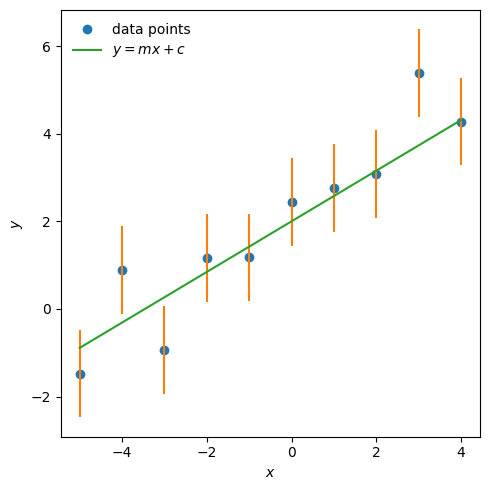

In [8]:
plt.figure(figsize=(5,5))

plt.plot(x, data, marker = 'o', linestyle = 'none', label = 'data points')
plt.errorbar(x, data, yerr=np.ones_like(x)*noise_sigma, linestyle = 'none')
plt.plot(x, gen_model(x=x, theta = theta_true, c = c_true), label = r"$y = mx + c$")

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend(loc='upper left', frameon = False)
plt.tight_layout()
#plt.savefig("data_with_errorbar.pdf")
#plt.show()

In [9]:
def log_likelihood(theta = np.pi/4.0, intercept = 0.0, _self=None):

    sigma = np.ones(shape = (len(x)))*noise_sigma

    model = gen_model(x = x, theta = theta, c = intercept) 
 
    # Compute the log-likelihood: -0.5 \times \chi^2
    logL = -0.5*np.sum((data - model)**2/sigma**2)

    return logL

In [10]:
info = {"likelihood": {"line_fit": log_likelihood}}

In [11]:
#play with following six parameters of parameter priors and chain starting point, and see how the output changes

theta_prior_loc = theta_true/1.5 #some reasonable location for demonstration
theta_prior_width = 1.0 #prior width
c_prior_loc = c_true*1.5 #some reasonable location for demonstration
c_prior_width = 1.0 #prior width 


theta_starting_point = theta_true
intercept_starting_point = c_true

In [12]:
info["params"] = {
    'theta': {'prior': {'dist': 'norm', 'loc': theta_prior_loc, 'scale': theta_prior_width}, 
              'ref': theta_starting_point, 'latex': '\\theta'}, 
    'intercept': {'prior': {'dist': 'norm', 'loc': c_prior_loc, 'scale': c_prior_width}, 
                  'ref': intercept_starting_point, 'proposal': 0.1, 'latex': 'c'}}

In [13]:
#specify slope as a derived parameter
info["params"]["m"] = {"derived": slope}

In [14]:
#create a directory to store the output e.g. './notebook_chains' and prefix (e.g. line_fit) for the output files
info["output"] = "./notebook_chains/line_fit"

In [15]:
info["sampler"] = {"mcmc": {"Rminus1_stop": 0.005, "max_tries": 1000}}

In [16]:
#check the inputs that will be provided to the Cobaya sampler
info.items()

dict_items([('likelihood', {'line_fit': <function log_likelihood at 0x7fa443f0c360>}), ('params', {'theta': {'prior': {'dist': 'norm', 'loc': 0.3490658503988659, 'scale': 1.0}, 'ref': 0.5235987755982988, 'latex': '\\theta'}, 'intercept': {'prior': {'dist': 'norm', 'loc': 3.0, 'scale': 1.0}, 'ref': 2.0, 'proposal': 0.1, 'latex': 'c'}, 'm': {'derived': <function slope at 0x7fa44607b7e0>}}), ('output', './notebook_chains/line_fit'), ('sampler', {'mcmc': {'Rminus1_stop': 0.005, 'max_tries': 1000}})])

In [17]:
updated_info, sampler = run(info)

[output] Output to be read-from/written-into folder './notebook_chains', with prefix 'line_fit'
[line_fit] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[mcmc] Initial point: theta:0.5235988, intercept:2
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {line_fit: 43600.0}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Sampling!
[mcmc] Progress @ 2024-02-25 00:32:53 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.107
[mcmc]  - Convergence of means: R-1 = 1.116511 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 160 samples accepted.
[mcmc]  - 

[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 2880 samples accepted.
[mcmc]  - Acceptance rate: 0.304
[mcmc]  - Convergence of means: R-1 = 0.010531 after 2304 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 2960 samples accepted.
[mcmc]  - Acceptance rate: 0.304
[mcmc]  - Convergence of means: R-1 = 0.009975 after 2368 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3040 samples accepted.
[mcmc]  - Acceptance rate: 0.303
[mcmc]  - Convergence of means: R-1 = 0.007692 after 2432 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3120 samples accepted.
[mcmc]  - Acceptance rate: 0.302
[mcmc]  - Convergence of means: R-1 = 0.006687 after 2496 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3200 samples accepted.
[mcmc]  - Acceptance rate:

[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 5920 samples accepted.
[mcmc]  - Acceptance rate: 0.296
[mcmc]  - Convergence of means: R-1 = 0.008972 after 4736 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6000 samples accepted.
[mcmc]  - Acceptance rate: 0.295
[mcmc]  - Convergence of means: R-1 = 0.007684 after 4800 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6080 samples accepted.
[mcmc]  - Acceptance rate: 0.294
[mcmc]  - Convergence of means: R-1 = 0.006966 after 4864 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6160 samples accepted.
[mcmc]  - Acceptance rate: 0.294
[mcmc]  - Convergence of means: R-1 = 0.006765 after 4928 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 6240 samples accepted.
[mcmc]  - Acceptance rate:

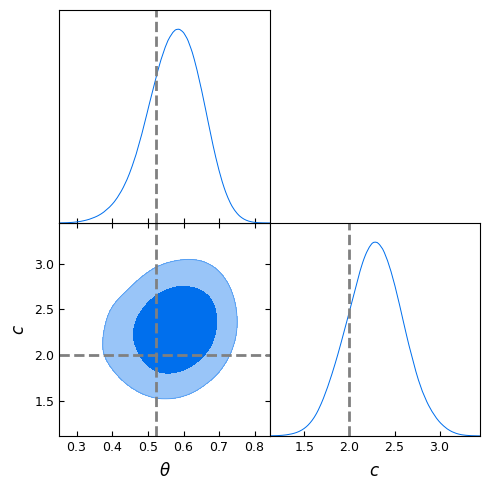

In [18]:
#here we remove first 20% points as burn-in sample
%matplotlib inline
gdsamples = sampler.products(to_getdist=True, skip_samples=0.2)["sample"]
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples, ["theta", "intercept"], filled=True)
#plot a line indicating the "true" parameter values
gdplot.add_param_markers(
    param_value_dict= {"theta":theta_true, "intercept":c_true},
    color=None,
    ls='--',
    lw=2.0,
)

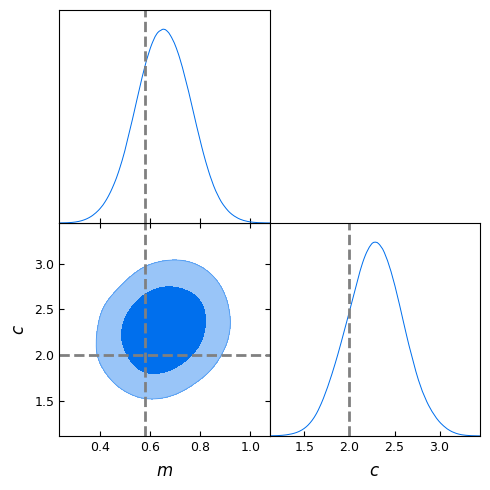

In [19]:
#here we remove first 20% points as burn-in sample
%matplotlib inline
gdsamples = sampler.products(to_getdist=True, skip_samples=0.2)["sample"]
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples, ["m", "intercept"], filled=True)
#plot a line indicating the "true" parameter values
gdplot.add_param_markers(
    param_value_dict= {"m":m_true, "intercept":c_true},
    color=None,
    ls='--',
    lw=2.0,
)